In [168]:
ls

Company_Data.csv                     assignment2/
DECISION TREE -COMPANY DATA.ipynb    finished assignment/
DECISION TREE -FRAUD CHECK.ipynb     problem statement(company data).txt
Fraud_check.csv                      unsubmitted assignment/
Problem_statement(Fraudcheck).txt


In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import tree

In [170]:
data=pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [171]:
data.sum()

Sales                                                    2998.53
CompPrice                                                  49990
Income                                                     27463
Advertising                                                 2654
Population                                                105936
Price                                                      46318
ShelveLoc      BadGoodMediumMediumBadBadMediumGoodMediumMediu...
Age                                                        21329
Education                                                   5560
Urban          YesYesYesYesYesNoYesYesNoNoNoYesYesYesYesNoYes...
US             YesYesYesYesNoYesNoYesNoYesYesYesNoYesYesNoNoY...
dtype: object

In [172]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [173]:
data.duplicated().sum()

0

In [174]:
data.shape

(400, 11)

In [175]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [176]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

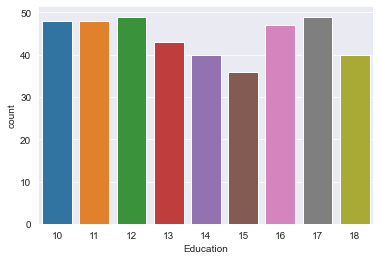

In [177]:
sns.countplot(data.Education)

<AxesSubplot:xlabel='Population', ylabel='Count'>

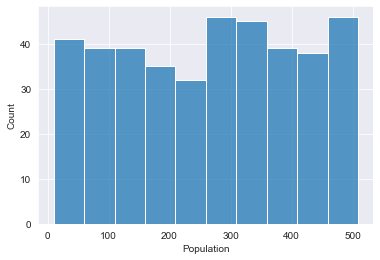

In [178]:
sns.histplot(data.Population)

<AxesSubplot:xlabel='Advertising', ylabel='Count'>

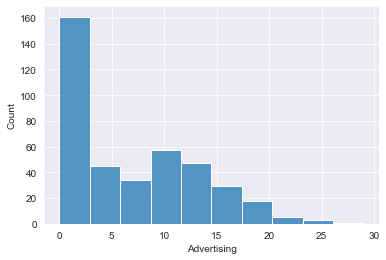

In [179]:
sns.histplot(data.Advertising)

<AxesSubplot:xlabel='Income', ylabel='Count'>

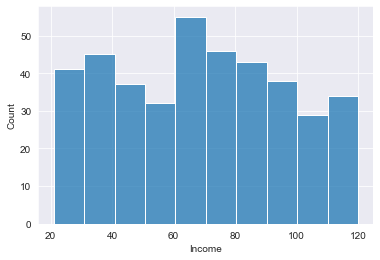

In [180]:
sns.histplot(data.Income)

<AxesSubplot:xlabel='CompPrice', ylabel='Count'>

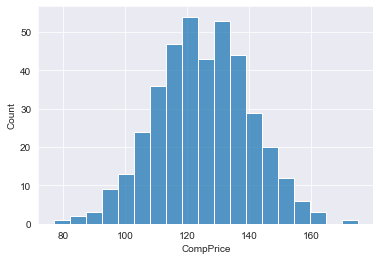

In [181]:
sns.histplot(data.CompPrice)

<AxesSubplot:xlabel='Age', ylabel='Count'>

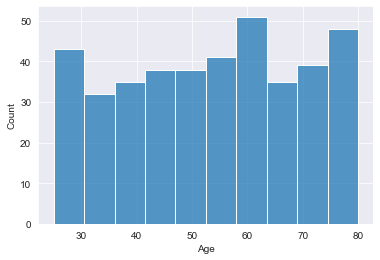

In [182]:
sns.histplot(data.Age)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

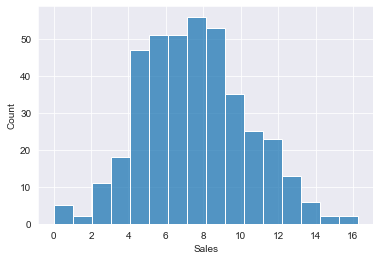

In [183]:
sns.histplot(data.Sales)

<AxesSubplot:>

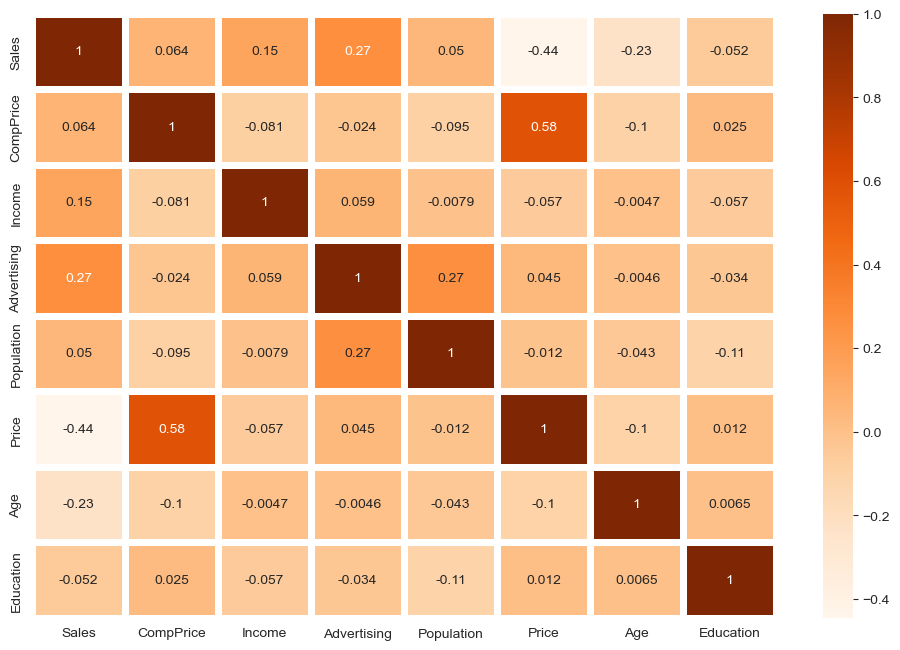

In [184]:
plt.figure(figsize=[12,8],dpi=100)
sns.heatmap(data.corr(),annot=True,linewidths=5,cmap='Oranges')

Text(0.5, 1.0, 'Education')

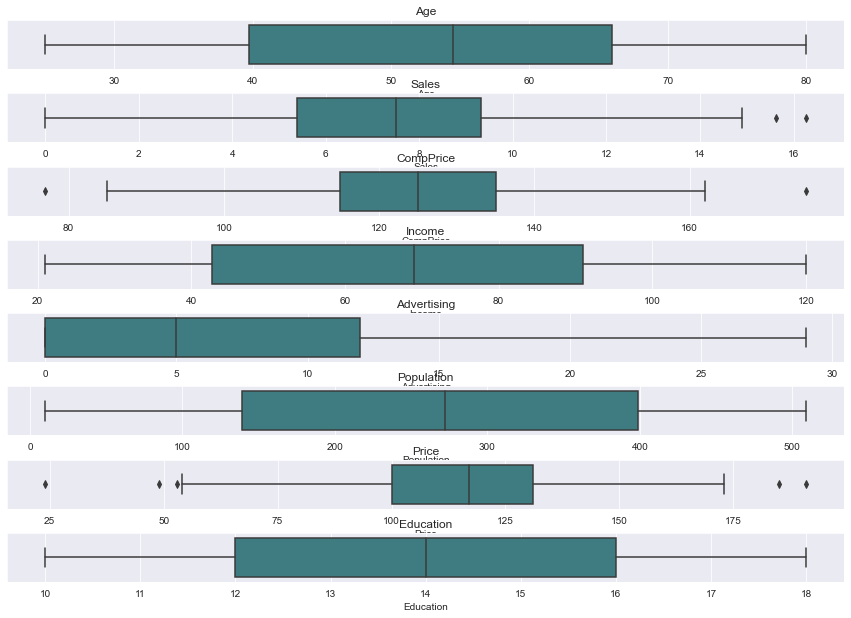

In [185]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(15, 10))

fig.subplots_adjust(hspace=0.5, bottom=0.1)

sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[0])
axes[0].set_title('Age')
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[1])
axes[1].set_title('Sales')
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[2])
axes[2].set_title('CompPrice')
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[3])
axes[3].set_title('Income')
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[4])
axes[4].set_title('Advertising')
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[5])
axes[5].set_title('Population')
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[6])
axes[6].set_title('Price')
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
axes[7].set_title('Education')

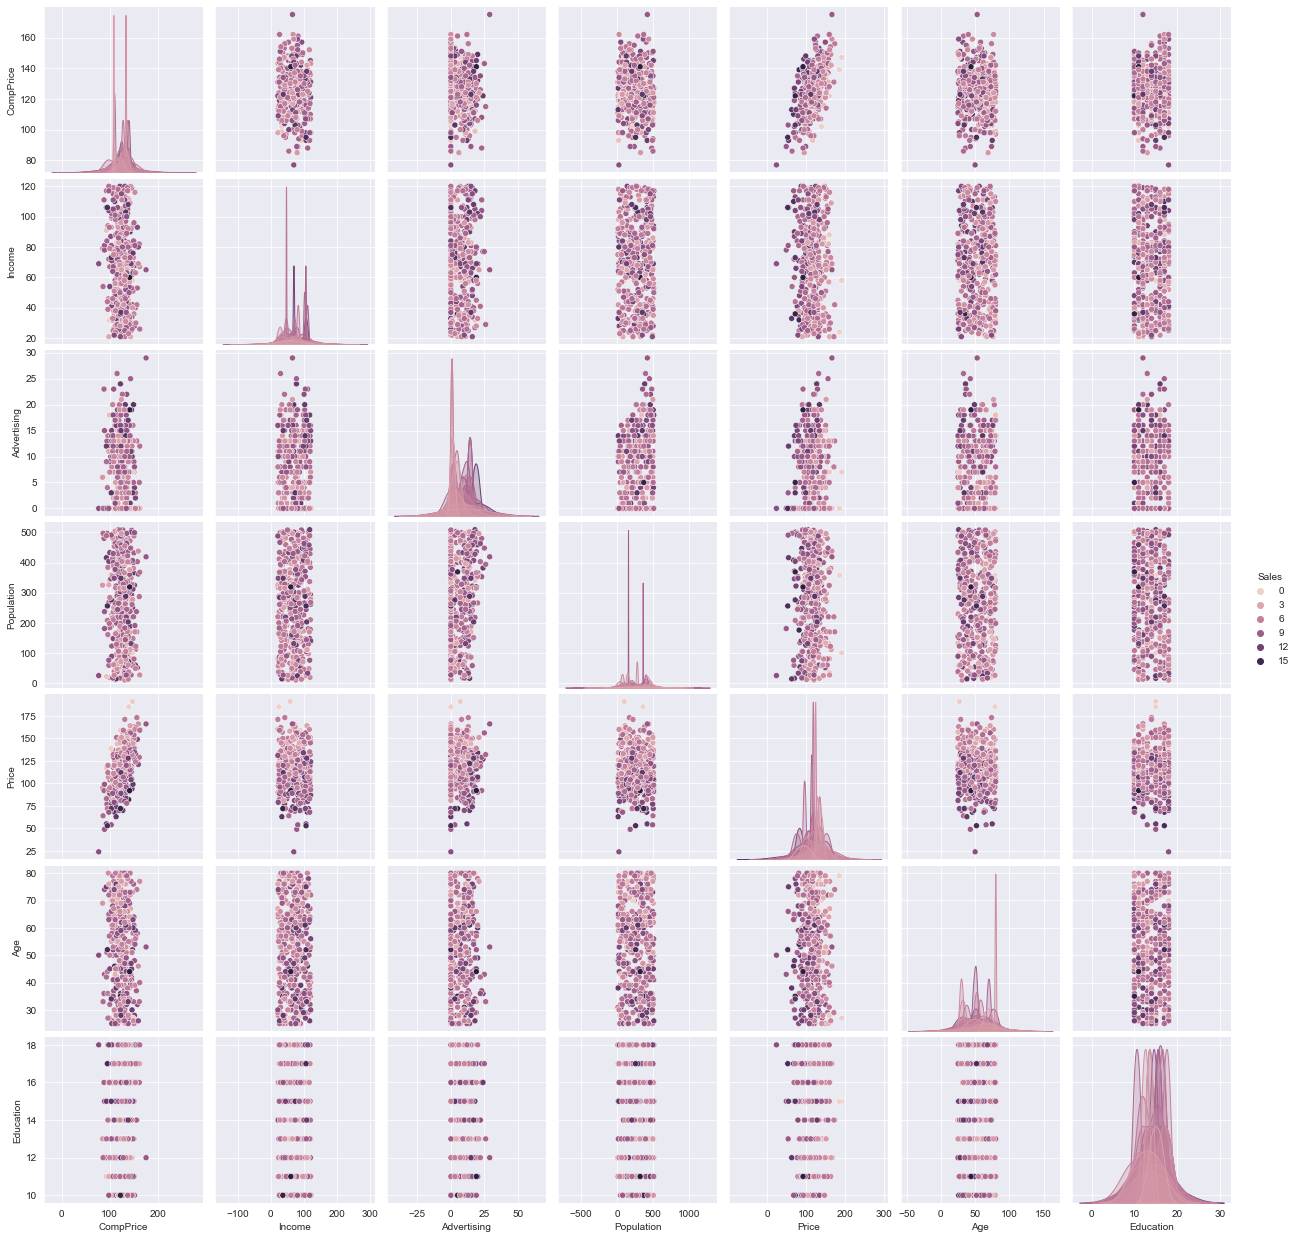

In [186]:
sns.pairplot(data=data, hue= "Sales")

In [187]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
data1 = encoder.fit_transform(data)

In [188]:
data1.sample(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
346,8.97,132,107,0,144,125,3,33,13,2,2
363,10.26,111,75,1,377,108,2,25,12,1,2
219,10.62,116,79,19,359,116,2,58,17,1,1
376,16.27,141,60,19,319,92,2,44,11,1,1
26,8.33,107,115,11,496,131,2,50,11,2,1
272,12.98,113,33,0,14,63,2,38,12,1,2


In [189]:
sale_val = []
for value in data["Sales"]:
     if value<=7.49:
        sale_val.append("low")
     else:
        sale_val.append("high")

data1["sale_val"]= sale_val

In [193]:
data1.sample(4)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale_val
5,10.81,124,113,13,501,72,1,78,16,2,1,high
72,5.52,115,45,0,432,116,3,25,15,1,2,low
213,8.23,149,84,5,220,139,3,33,10,1,1,high
7,11.85,136,81,15,425,120,2,67,10,1,1,high


In [194]:
x = data1.drop(['sale_val','Sales'], axis =1)
y = data1['sale_val']

In [198]:
x.sample(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
101,128,93,0,89,118,3,34,18,1,2
189,118,117,18,509,104,3,26,15,2,1
120,128,105,11,249,131,3,63,13,1,1


In [200]:
pd.DataFrame(y).sample(5)

,sale_val
240,high
22,low
54,low
233,high
370,high


In [201]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=40)

In [202]:
model1=DecisionTreeClassifier(criterion="entropy",max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [207]:
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 67.5
Train data Accuracy is: 78.4375


In [215]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [216]:
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test)*100)
#Predicting on train data
pred_train2 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train)*100)


Test data Accuracy is: 68.75
Train data Accuracy is: 90.625


In [217]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [219]:
#Predicting on test data
pred_test3 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test)*100)
#Predicting on train data
pred_train3 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train)*100)

Test data Accuracy is: 67.5
Train data Accuracy is: 91.875


Text(0.5, 1.0, 'Decision tree using Entropy')

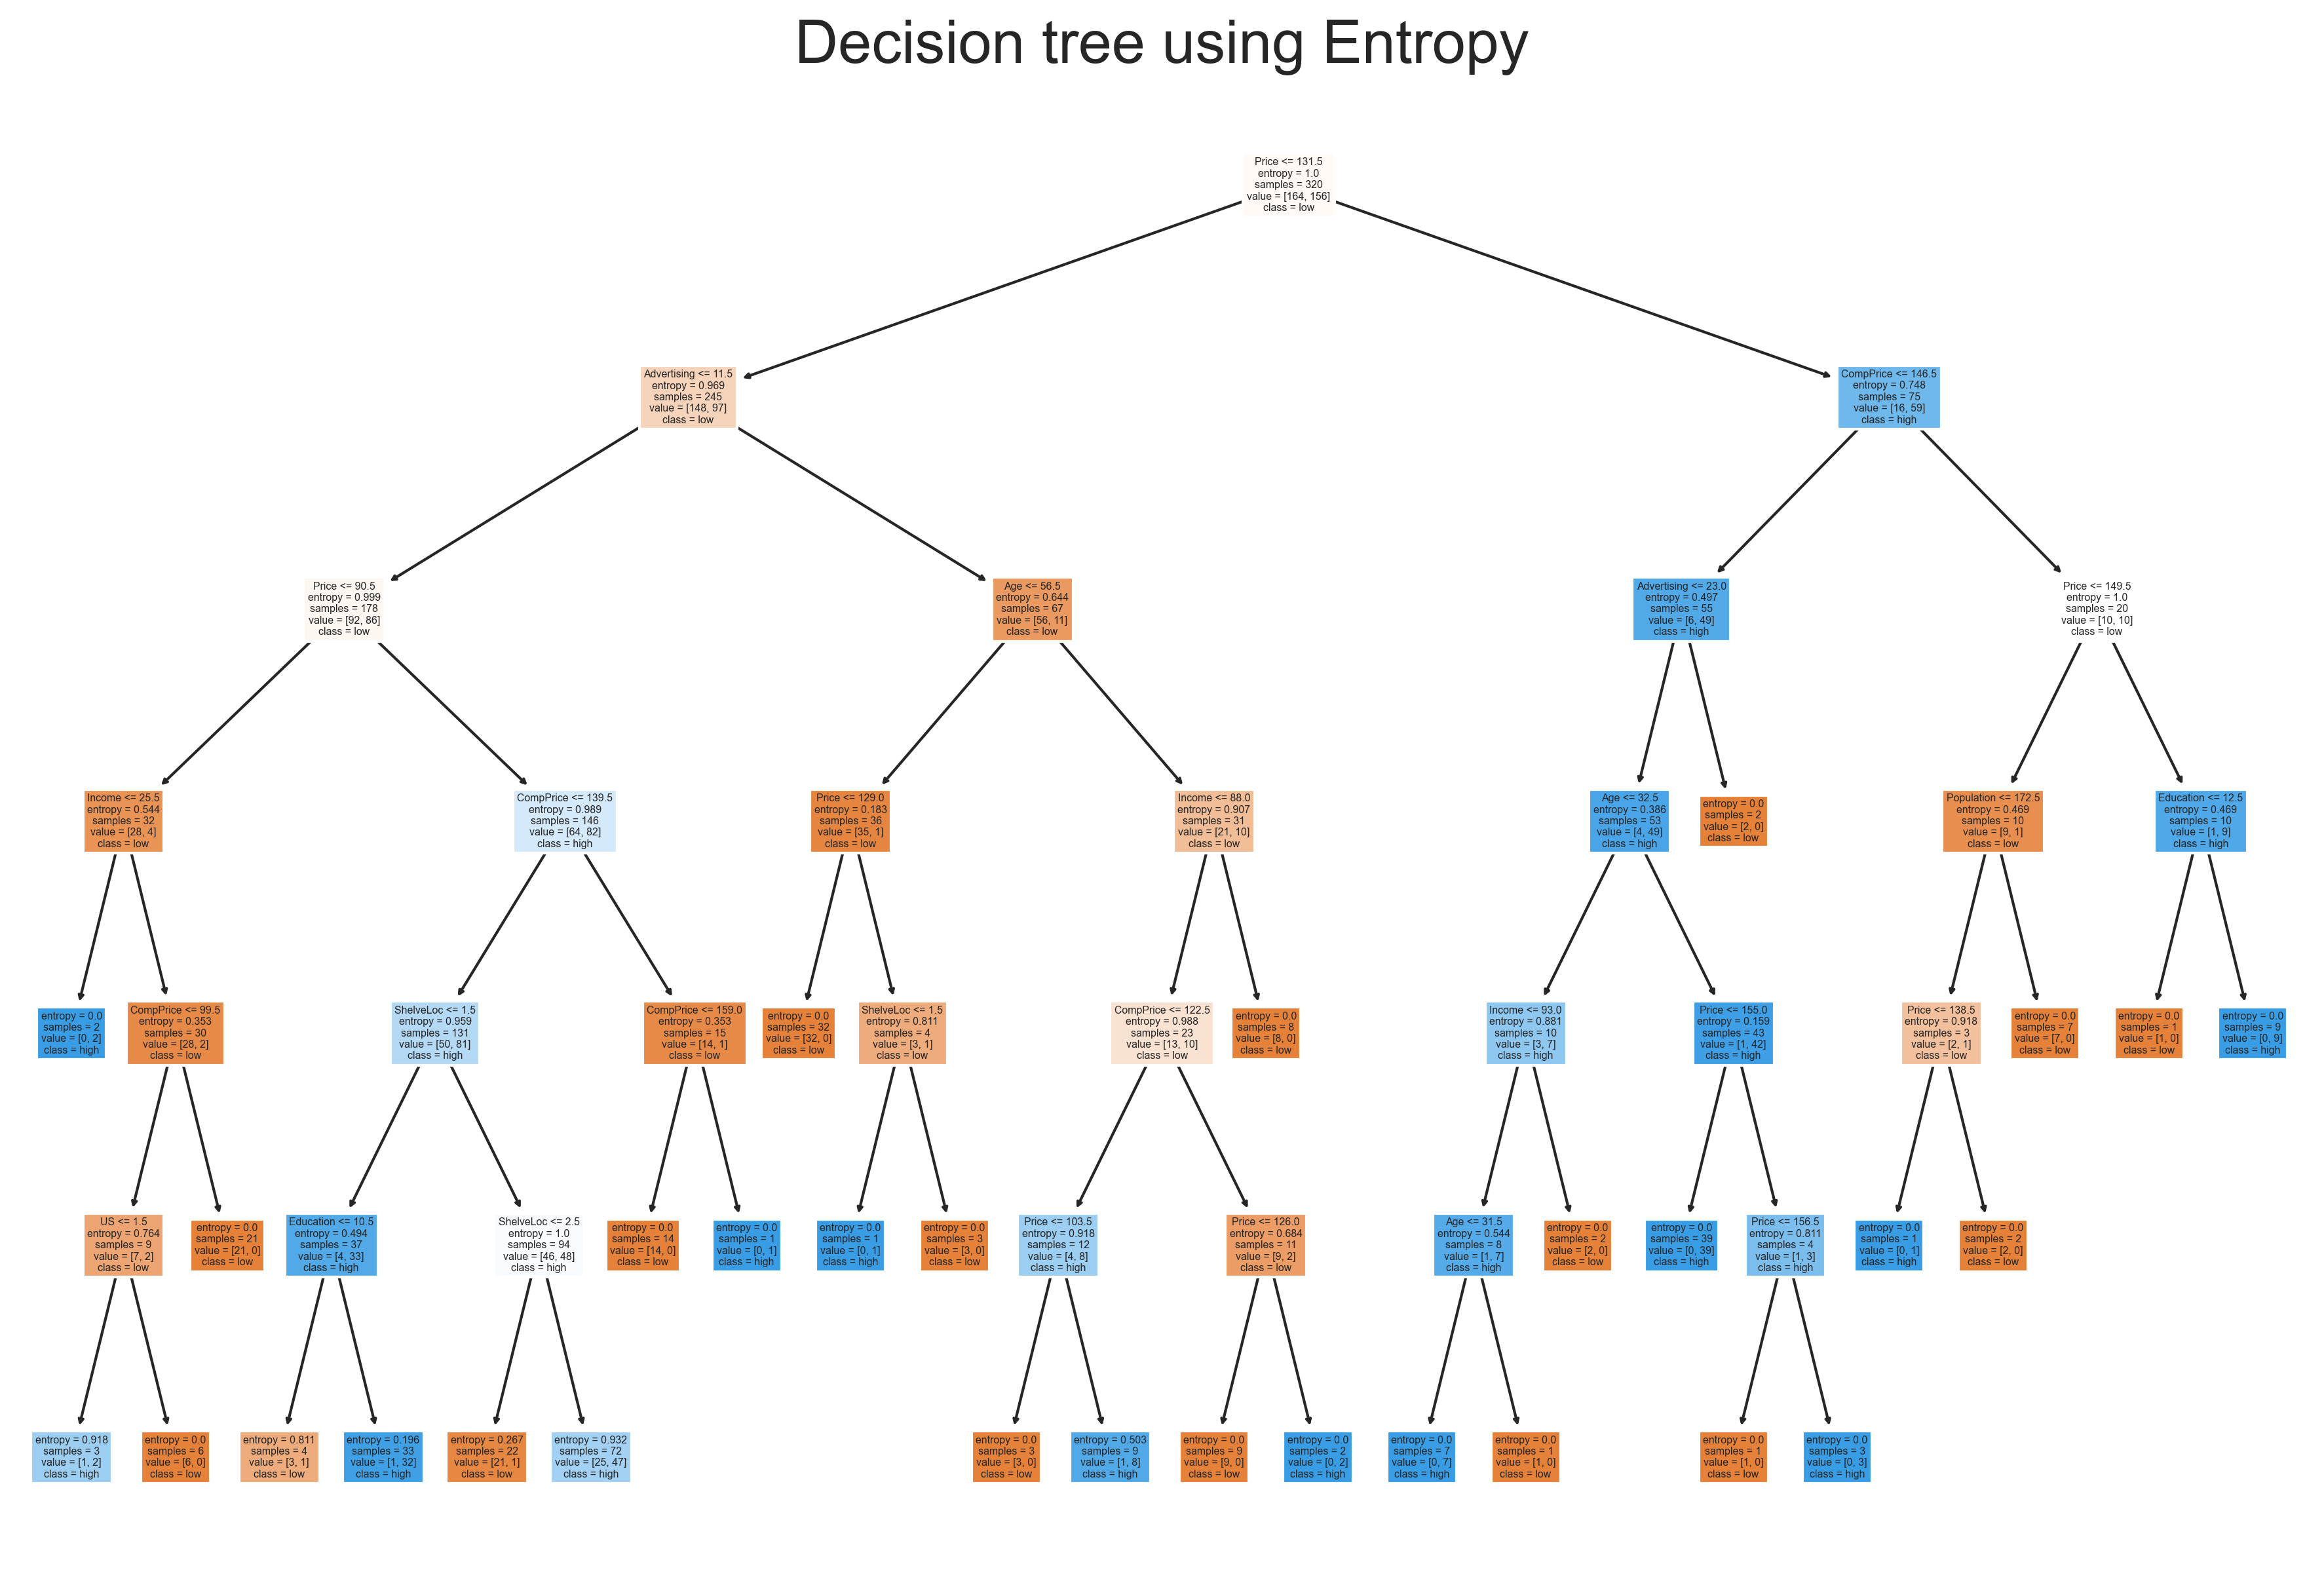

In [236]:
plt.figure(figsize=[15,10],dpi=300)
tree.plot_tree(model2,feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'],filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

In [246]:
y_pred
pd.Series(y_pred).value_counts()

low     49
high    31
dtype: int64

In [248]:
crosstab=pd.crosstab(y_test,y_pred)
crosstab

col_0,high,low
sale_val,,
high,20,15
low,11,34


<AxesSubplot:xlabel='col_0', ylabel='sale_val'>

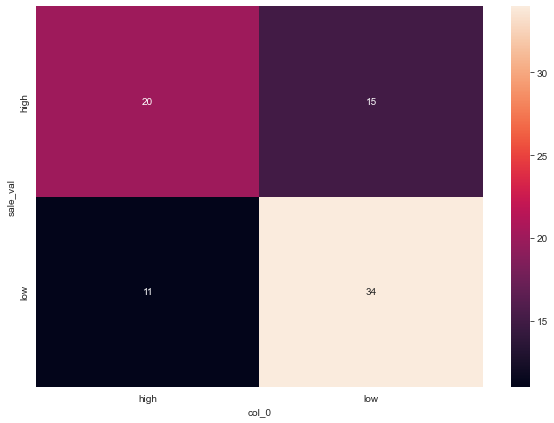

In [251]:
plt.figure(figsize=[10,7])
sns.heatmap(crosstab,annot=True)

In [256]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [257]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy})
accuracies

,max_depth,train_accuracy,test_accuracy
0,1,0.646875,0.5875
1,2,0.646875,0.5875
2,3,0.734375,0.6875
3,4,0.784375,0.6750
4,5,0.821875,0.6625
5,6,0.909375,0.6875
6,7,0.918750,0.6625
7,8,0.946875,0.6750
8,9,0.962500,0.7125
9,10,0.987500,0.6500


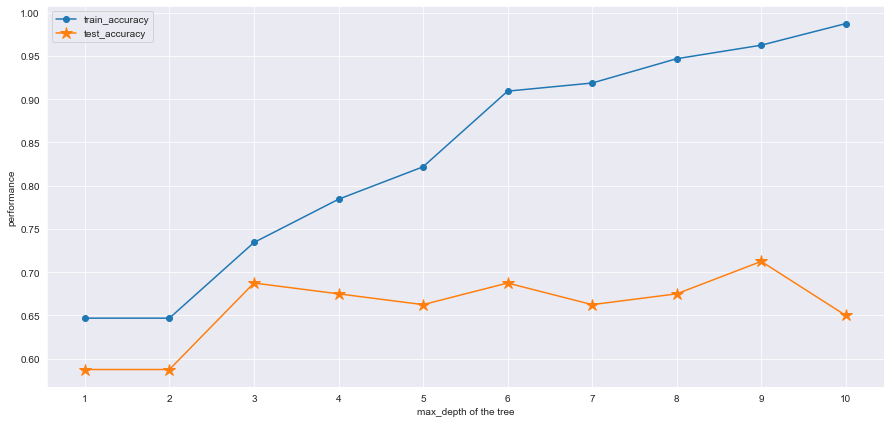

In [258]:
labels =['train_accuracy','test_accuracy']
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_accuracy'], marker = 'o')
plt.plot(accuracies['max_depth'], accuracies['test_accuracy'], marker = '*',markersize=12)
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()